In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.transforms import Bbox
import seaborn as sns
import scanpy as sc
import scipy
import sklearn

from importlib import reload

# local imports
import utils as ut
import plotting as plt2

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/hsc_landscape.anndata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

adata

Memory usage: current 8.89 GB, difference +8.89 GB


AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

# Nice plots

In [3]:
reload(plt2)
len(plt2.CUSTOM_COLORS)

35

/tmp/ipykernel_2501188/421229491.py:6: UserWarning: The palette list has more values (35) than needed (21), which may not be intended.
  sns.scatterplot(


n_counts cell_type dataset organ_tissue  n_genes  \
AAACCCAAGGTTACCT_iHSC    6558.0      iHSC    iHSC          nan    12480   
AAACCCAAGTTGAAGT_iHSC    5488.0      iHSC    iHSC          nan    12413   
AAACCCAAGTTGTCGT_iHSC    4330.0      iHSC    iHSC          nan    11906   
AAACCCACAGAAGCGT_iHSC    3442.0      iHSC    iHSC          nan    11861   
AAACCCACAGGAGGTT_iHSC   14427.0      iHSC    iHSC          nan    13436   

                      new_cluster          cell_label cluster_str    UMAP 1  \
AAACCCAAGGTTACCT_iHSC           1  Reprogrammed Cells          D2  8.989130   
AAACCCAAGTTGAAGT_iHSC           1  Reprogrammed Cells          D2  7.586400   
AAACCCAAGTTGTCGT_iHSC          10  Reprogrammed Cells         D11  8.027761   
AAACCCACAGAAGCGT_iHSC          10  Reprogrammed Cells         D11  8.584245   
AAACCCACAGGAGGTT_iHSC           1  Reprogrammed Cells          D2  9.509144   

                         UMAP 2  
AAACCCAAGGTTACCT_iHSC  4.937538  
AAACCCAAGTTGAAGT_iHSC  4.889987  
AAACCCAAGTTGTCGT_iHSC  3.311177  
AAACCCACAGAAGCGT_iHSC  2.674468  
AAACCCACAGGAGGTT_iHSC  4.923519

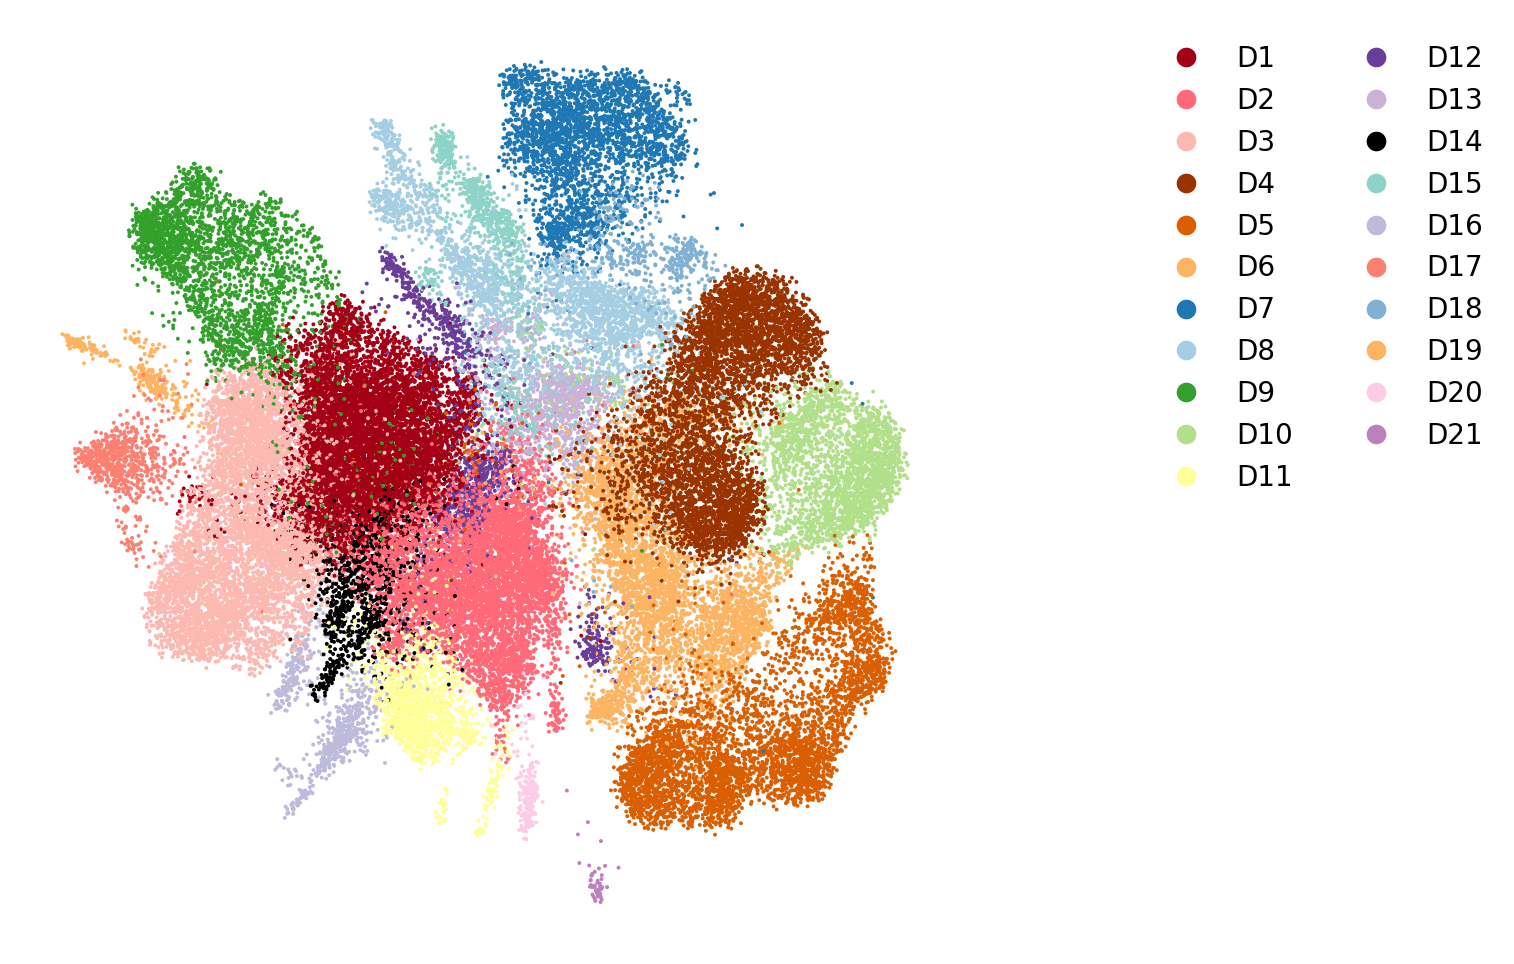

In [4]:
pdf = adata.obs.copy()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6

sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=2,
    hue='cluster_str',
    palette=plt2.CUSTOM_COLORS,
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
# sns.despine()
plt.axis(False)

sns.move_legend(plt.gca(),
                loc='upper right',
                title="",
                frameon=False,
                bbox_to_anchor=(1.6, 1),
                markerscale=5,
                ncol=2
               )
pdf.head()

['Reprogrammed Cells' 'Multipotent Progenitor' 'Multi-Lymphoid Progenitor'
 'Megakaryocyte-Erythroid Progenitor'
 'Lineage Negative (CD34low/CD164high)'
 'Lineage Negative (CD34Pos/CD164Pos)' 'Hematopoietic Stem Cell'
 'Fibroblast']


n_counts cell_type dataset organ_tissue  n_genes  \
AAACCCAAGGTTACCT_iHSC    6558.0      iHSC    iHSC          nan    12480   
GTCGTTCCAGCGTTGC_iHSC    6624.0      iHSC    iHSC          nan    12457   
GTCTACCTCCAACCAA_iHSC    7834.0      iHSC    iHSC          nan    12503   
GTCTACCTCAACCTTT_iHSC   14395.0      iHSC    iHSC          nan    13597   
GTCTACCGTATCAGCT_iHSC    4882.0      iHSC    iHSC          nan    11880   

                      new_cluster          cell_label cluster_str     UMAP 1  \
AAACCCAAGGTTACCT_iHSC           1  Reprogrammed Cells          D2   8.989130   
GTCGTTCCAGCGTTGC_iHSC           0  Reprogrammed Cells          D1   6.892259   
GTCTACCTCCAACCAA_iHSC           1  Reprogrammed Cells          D2   9.725594   
GTCTACCTCAACCTTT_iHSC          11  Reprogrammed Cells         D12   8.707822   
GTCTACCGTATCAGCT_iHSC           1  Reprogrammed Cells          D2  10.550939   

                         UMAP 2  
AAACCCAAGGTTACCT_iHSC  4.937538  
GTCGTTCCAGCGTTGC_iHSC  5.143793  
GTCTACCTCCAACCAA_iHSC  4.718451  
GTCTACCTCAACCTTT_iHSC  4.972127  
GTCTACCGTATCAGCT_iHSC  4.780005

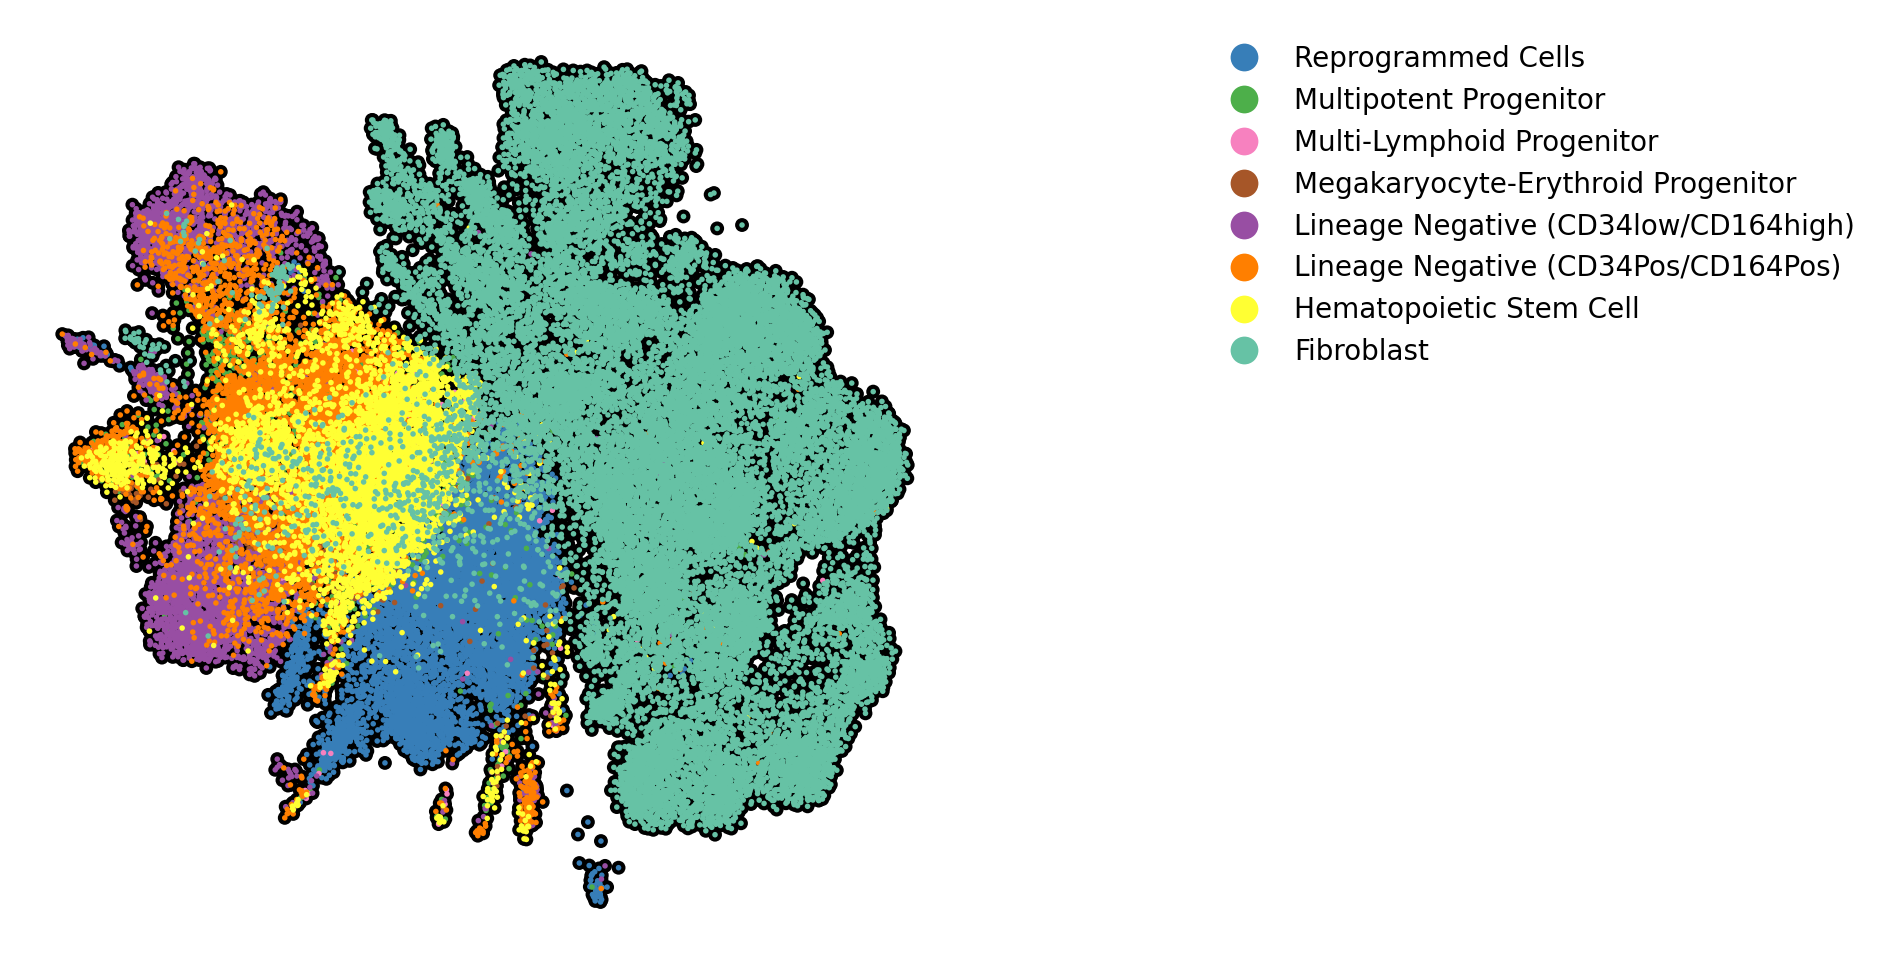

In [5]:
pdf = adata.obs.copy()
pdf['cell_label'] = pdf['cell_label'].astype(str)
pdf = pdf.sort_values(by='cell_label',  ascending=False)
print(pdf['cell_label'].unique())

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6


color_list = [
    '#377EB8', 
    '#4DAF4A',
    '#F781BF', 
    '#A65628', 
    '#984EA3', 
    '#FF7F00',
    '#FFFF33',
    '#66C2A5',
]


sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=25,
    c='k',
)


sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=4,
    hue='cell_label',
    palette=color_list,
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
# sns.despine()
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    frameon=False,
    bbox_to_anchor=(2.0, 1),
    markerscale=5,
    ncol=1,
)

pdf.head()

In [6]:
# break

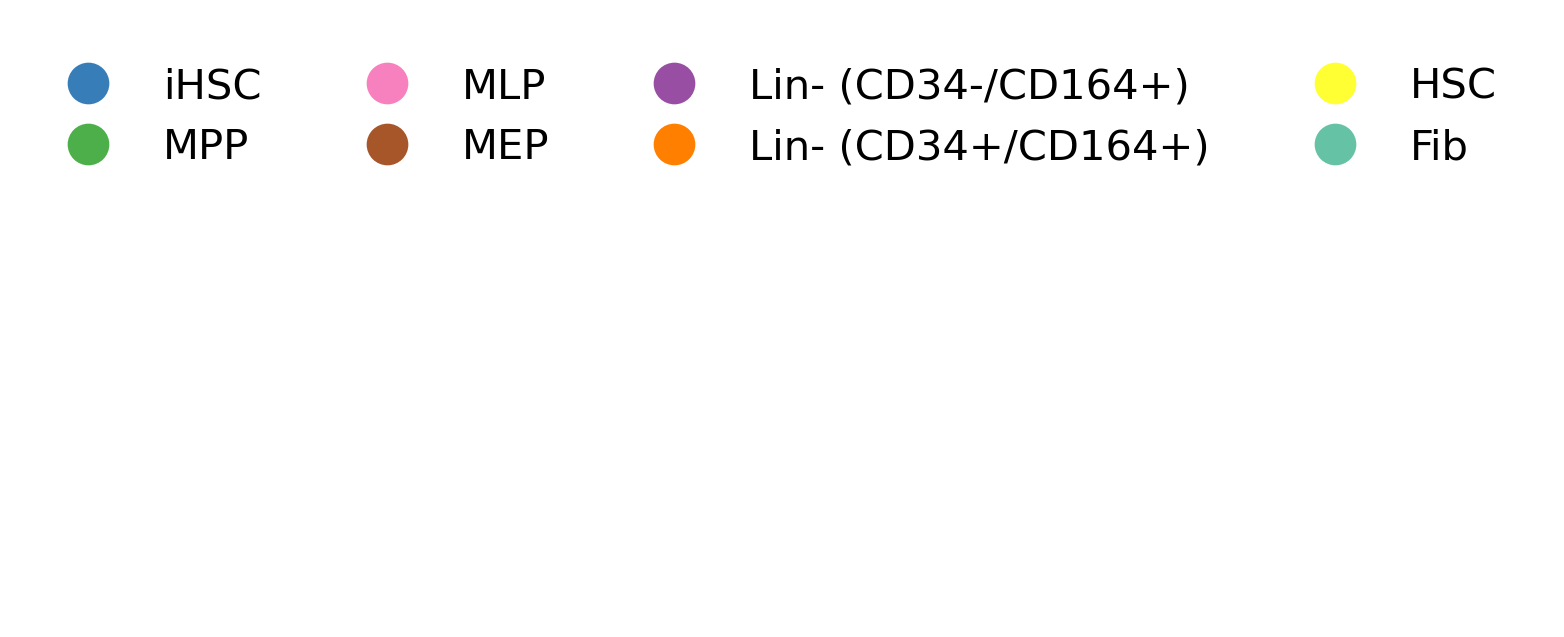

In [7]:
def make_legend():
    """Creates a standalone legend for the cell types with their respective colors."""

    labels = [
        "iHSC",   # "Reprogrammed Cells",
        "MPP",   # "Multipotent Progenitor",
        "MLP",   # "Multi-Lymphoid Progenitor",
        "MEP",   # "Megakaryocyte-Erythroid Progenitor",
        "Lin- (CD34-/CD164+)",   # "Lineage Negative (CD34low/CD164high)",
        "Lin- (CD34+/CD164+)",   # "Lineage Negative (CD34Pos/CD164Pos)",
        "HSC",   # "Hematopoietic Stem Cell",
        "Fib",   # "Fibroblast",
    ]

    colors = [
      '#377EB8', '#4DAF4A', '#F781BF', '#A65628', '#984EA3', '#FF7F00', '#FFFF33', '#66C2A5']
    
    


    fig = plt.figure(figsize=(4, 2.5))  # Set the figure size appropriately
    ax = fig.add_subplot(111)

    for label, color in zip(labels, colors):
        ax.plot([], [], 
                marker='o', 
                linestyle='none', 
                color=color, label=label)

    ax.legend(
        frameon=False,
        loc='best',
        markerscale=1.5,
        ncols=4,
    )
    ax.axis('off')

    plt.show()
    
plt.rcParams['figure.dpi'] = 300
make_legend()

# Expression

/tmp/ipykernel_2501188/1224691193.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


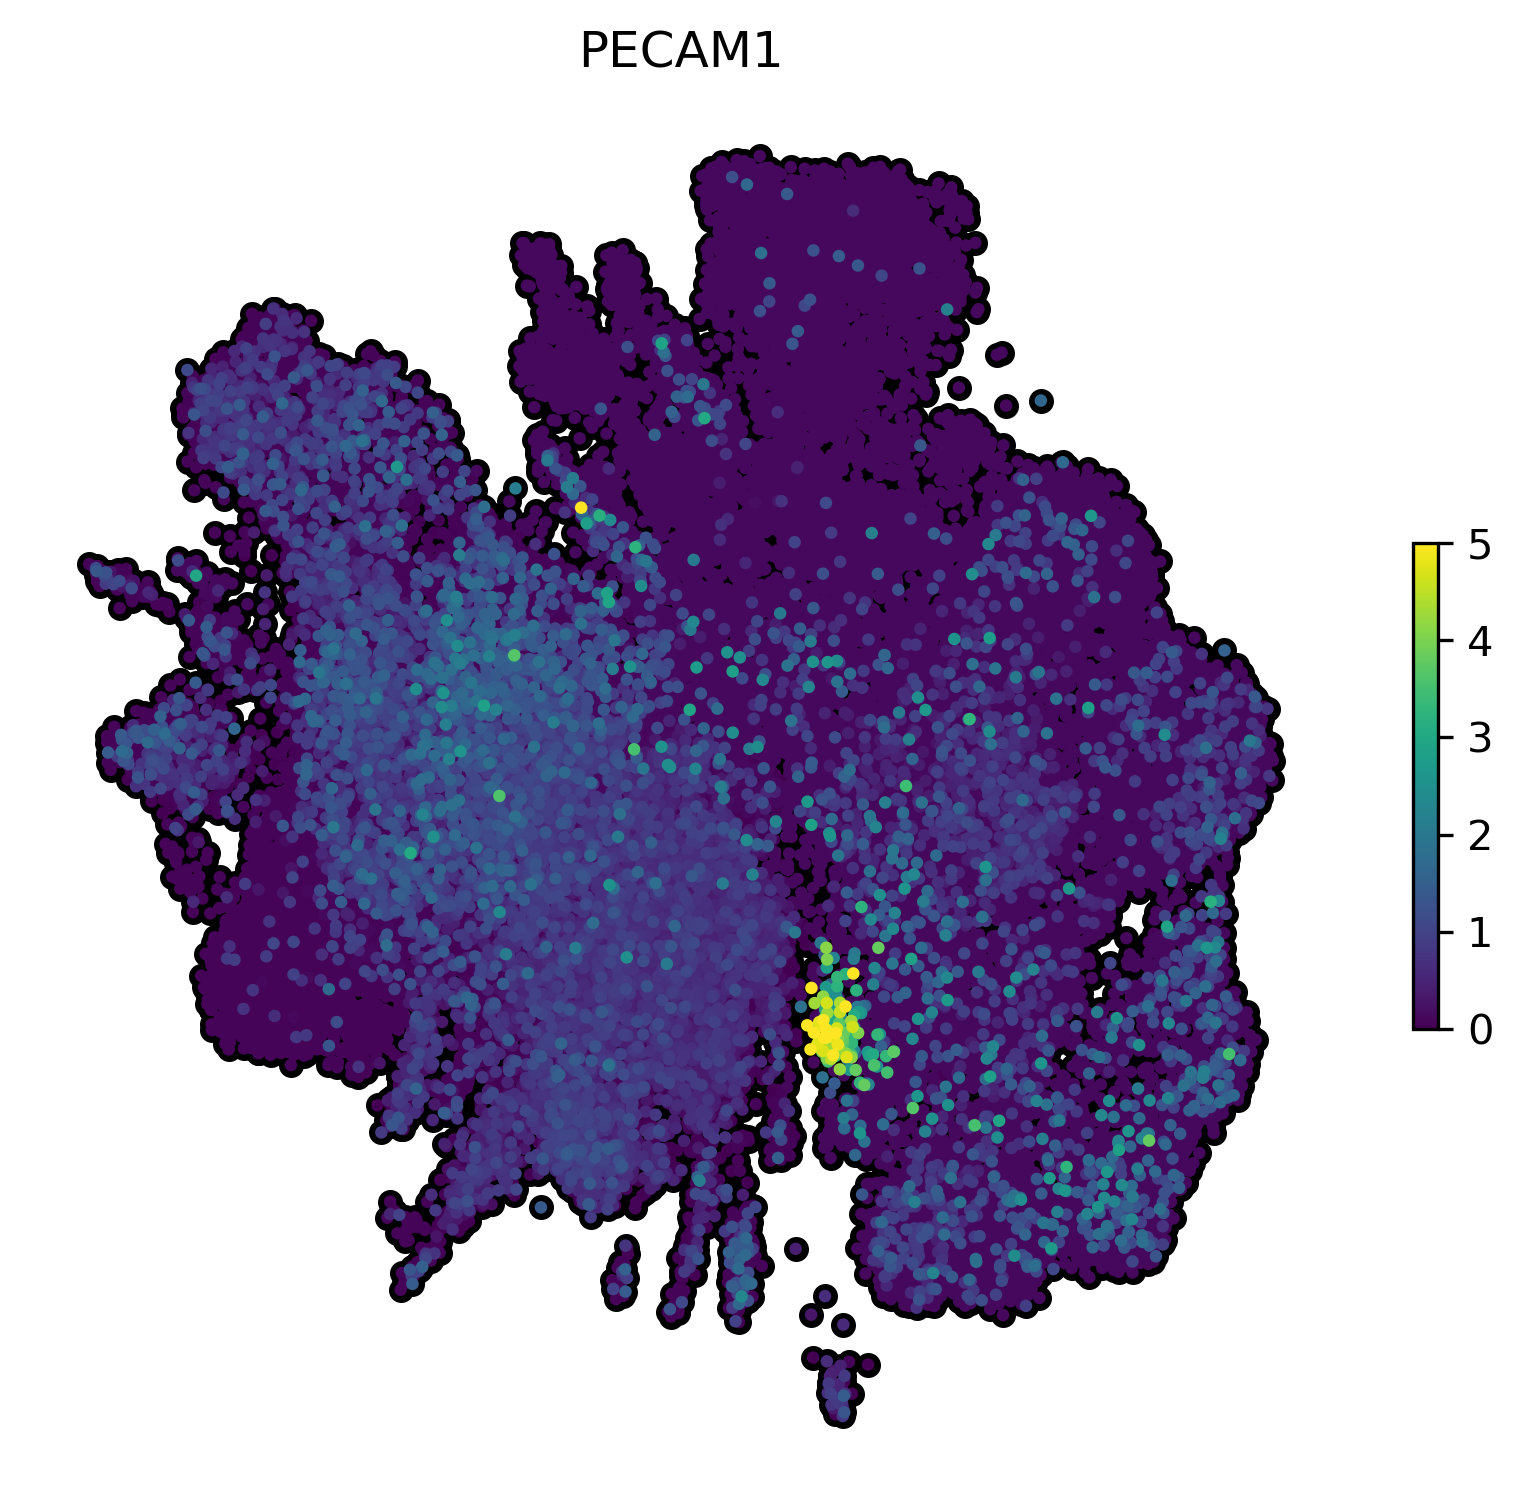

In [8]:
def plot_gene_expression(adata, gene, vmin=None, vmax=None, colorbar=True):
    """
    Plots gene expression on a UMAP embedding with a color gradient.

    Args:
      adata: An AnnData object containing gene expression and UMAP coordinates.
      gene: The gene to plot.
      vmin: The minimum value for the color scale (default 0).
      vmax: The maximum value for the color scale (default 2).
    """

    expression = adata[:, gene].to_df().values.ravel()
    order = np.argsort(expression)

    # Determine vmin and vmax if not provided
    if vmin is None:
        vmin = np.min(expression)
    else:
        vmin = max(np.min(expression), vmin)
        
    if vmax is None:
        vmax = np.max(expression)
    else:
        vmax = min(np.max(expression), vmax)
        

    fig, ax = plt.subplots()
    
    ax.scatter(
        adata.obsm['X_umap'][:, 0][order],
        adata.obsm['X_umap'][:, 1][order],
        c='k',
        s=25
    )

    scatter = ax.scatter(
        adata.obsm['X_umap'][:, 0][order],
        adata.obsm['X_umap'][:, 1][order],
        c=expression[order],
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        s=4,
    )

    plt.title(gene)
    plt.gca().set_aspect('auto')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel('UMAP 2')
    plt.xlabel('UMAP 1')

    plt.legend().remove()
    plt.axis(False)

    if colorbar:
        # Create colorbar
        norm = plt.Normalize(vmin, vmax)
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])  # This is necessary for the colorbar to work

        # Add colorbar to the plot
        cbar = ax.figure.colorbar(sm, ax=ax, shrink=0.35)
    
    
    
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 7, 6
gene = 'PECAM1'
plot_gene_expression(adata, gene, vmax=5, vmin=0)

# HSC Genes

In [9]:
fpath = "../resources/PanglaoDB_Augmented_2021.txt"
path_df = ut.load_pathway(fpath)

groupby = 'cell_label'
sort_by = 'Reprogrammed Cells'
path_name = 'Fibroblasts'

gene_list = list(path_df[path_df[path_name]].index)
gene_list = [x for x in gene_list if x in adata.var_names]
print(f"{len(gene_list)=}")

# extr5act genes and group
exp_df = adata[:, gene_list].to_df()
exp_df = exp_df.replace(0.0, pd.NA)
exp_df['group'] = adata.obs[groupby].values
exp_df = exp_df.groupby('group').mean().T

exp_df = exp_df.sort_values(by=sort_by, ascending=False)

exp_df.head(25)

# pang.head()

len(gene_list)=231


/tmp/ipykernel_2501188/1283179220.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_df['group'] = adata.obs[groupby].values


group     Fibroblast Hematopoietic Stem Cell  \
gene_name                                      
VIM         2.189307                2.347838   
DCN         2.020559                1.993889   
MGP         1.900719                1.855639   
GSN         1.756791                 1.73088   
FSTL1       1.462546                1.349939   
KLF2        1.244925                1.414545   
C1S         1.337374                1.299053   
S100A4      1.378192                1.163414   
CCN2         0.78162                0.325306   
IGFBP6      1.369757                1.200261   
KLF6        1.116528                1.194518   
IGFBP7      1.450354                1.010507   
IL6         0.770472                0.201318   
TIMP3       1.248343                1.148731   
C1R         1.196669                1.169647   
FOSB        1.346356                1.632297   
COL6A2      1.102918                1.072751   
EGR1        1.276007                 1.04373   
NNMT        1.053496                0.949088   
COL1A2      1.049626                0.955393   
MMP2        1.012548                0.935789   
MFAP5       1.249147                0.921773   
LUM         1.063952                0.872079   
CD55        0.729361                0.749222   
COL6A1      0.920039                 0.88249   

group     Lineage Negative (CD34Pos/CD164Pos)  \
gene_name                                       
VIM                                  2.206742   
DCN                                  1.991006   
MGP                                   1.83315   
GSN                                  1.718838   
FSTL1                                1.386573   
KLF2                                 1.136537   
C1S                                  1.295439   
S100A4                               1.075013   
CCN2                                 0.325009   
IGFBP6                               1.223379   
KLF6                                 0.811324   
IGFBP7                               1.309164   
IL6                                  0.200728   
TIMP3                                1.169051   
C1R                                  1.135319   
FOSB                                  0.94531   
COL6A2                               1.067154   
EGR1                                 1.009327   
NNMT                                 0.956513   
COL1A2                               0.938705   
MMP2                                 0.952267   
MFAP5                                 0.89744   
LUM                                  0.838438   
CD55                                 0.383674   
COL6A1                               0.862835   

group     Lineage Negative (CD34low/CD164high)  \
gene_name                                        
VIM                                   1.921432   
DCN                                   1.995586   
MGP                                   1.825795   
GSN                                   1.622444   
FSTL1                                 1.260348   
KLF2                                  1.186748   
C1S                                   1.299792   
S100A4                                   1.563   
CCN2                                  0.325009   
IGFBP6                                1.202514   
KLF6                                  0.738834   
IGFBP7                                1.199218   
IL6                                   0.200728   
TIMP3                                 1.116849   
C1R                                   1.100356   
FOSB                                   1.05365   
COL6A2                                1.038216   
EGR1                                  1.060818   
NNMT                                  0.954432   
COL1A2                                 0.94483   
MMP2                                  0.834903   
MFAP5                                 0.913668   
LUM                                   0.969687   
CD55                                  0.401069   
COL6A1                                0.843648   

group     Megakaryocyte-Eryt

Text(0.5, 154.16666666666654, '')

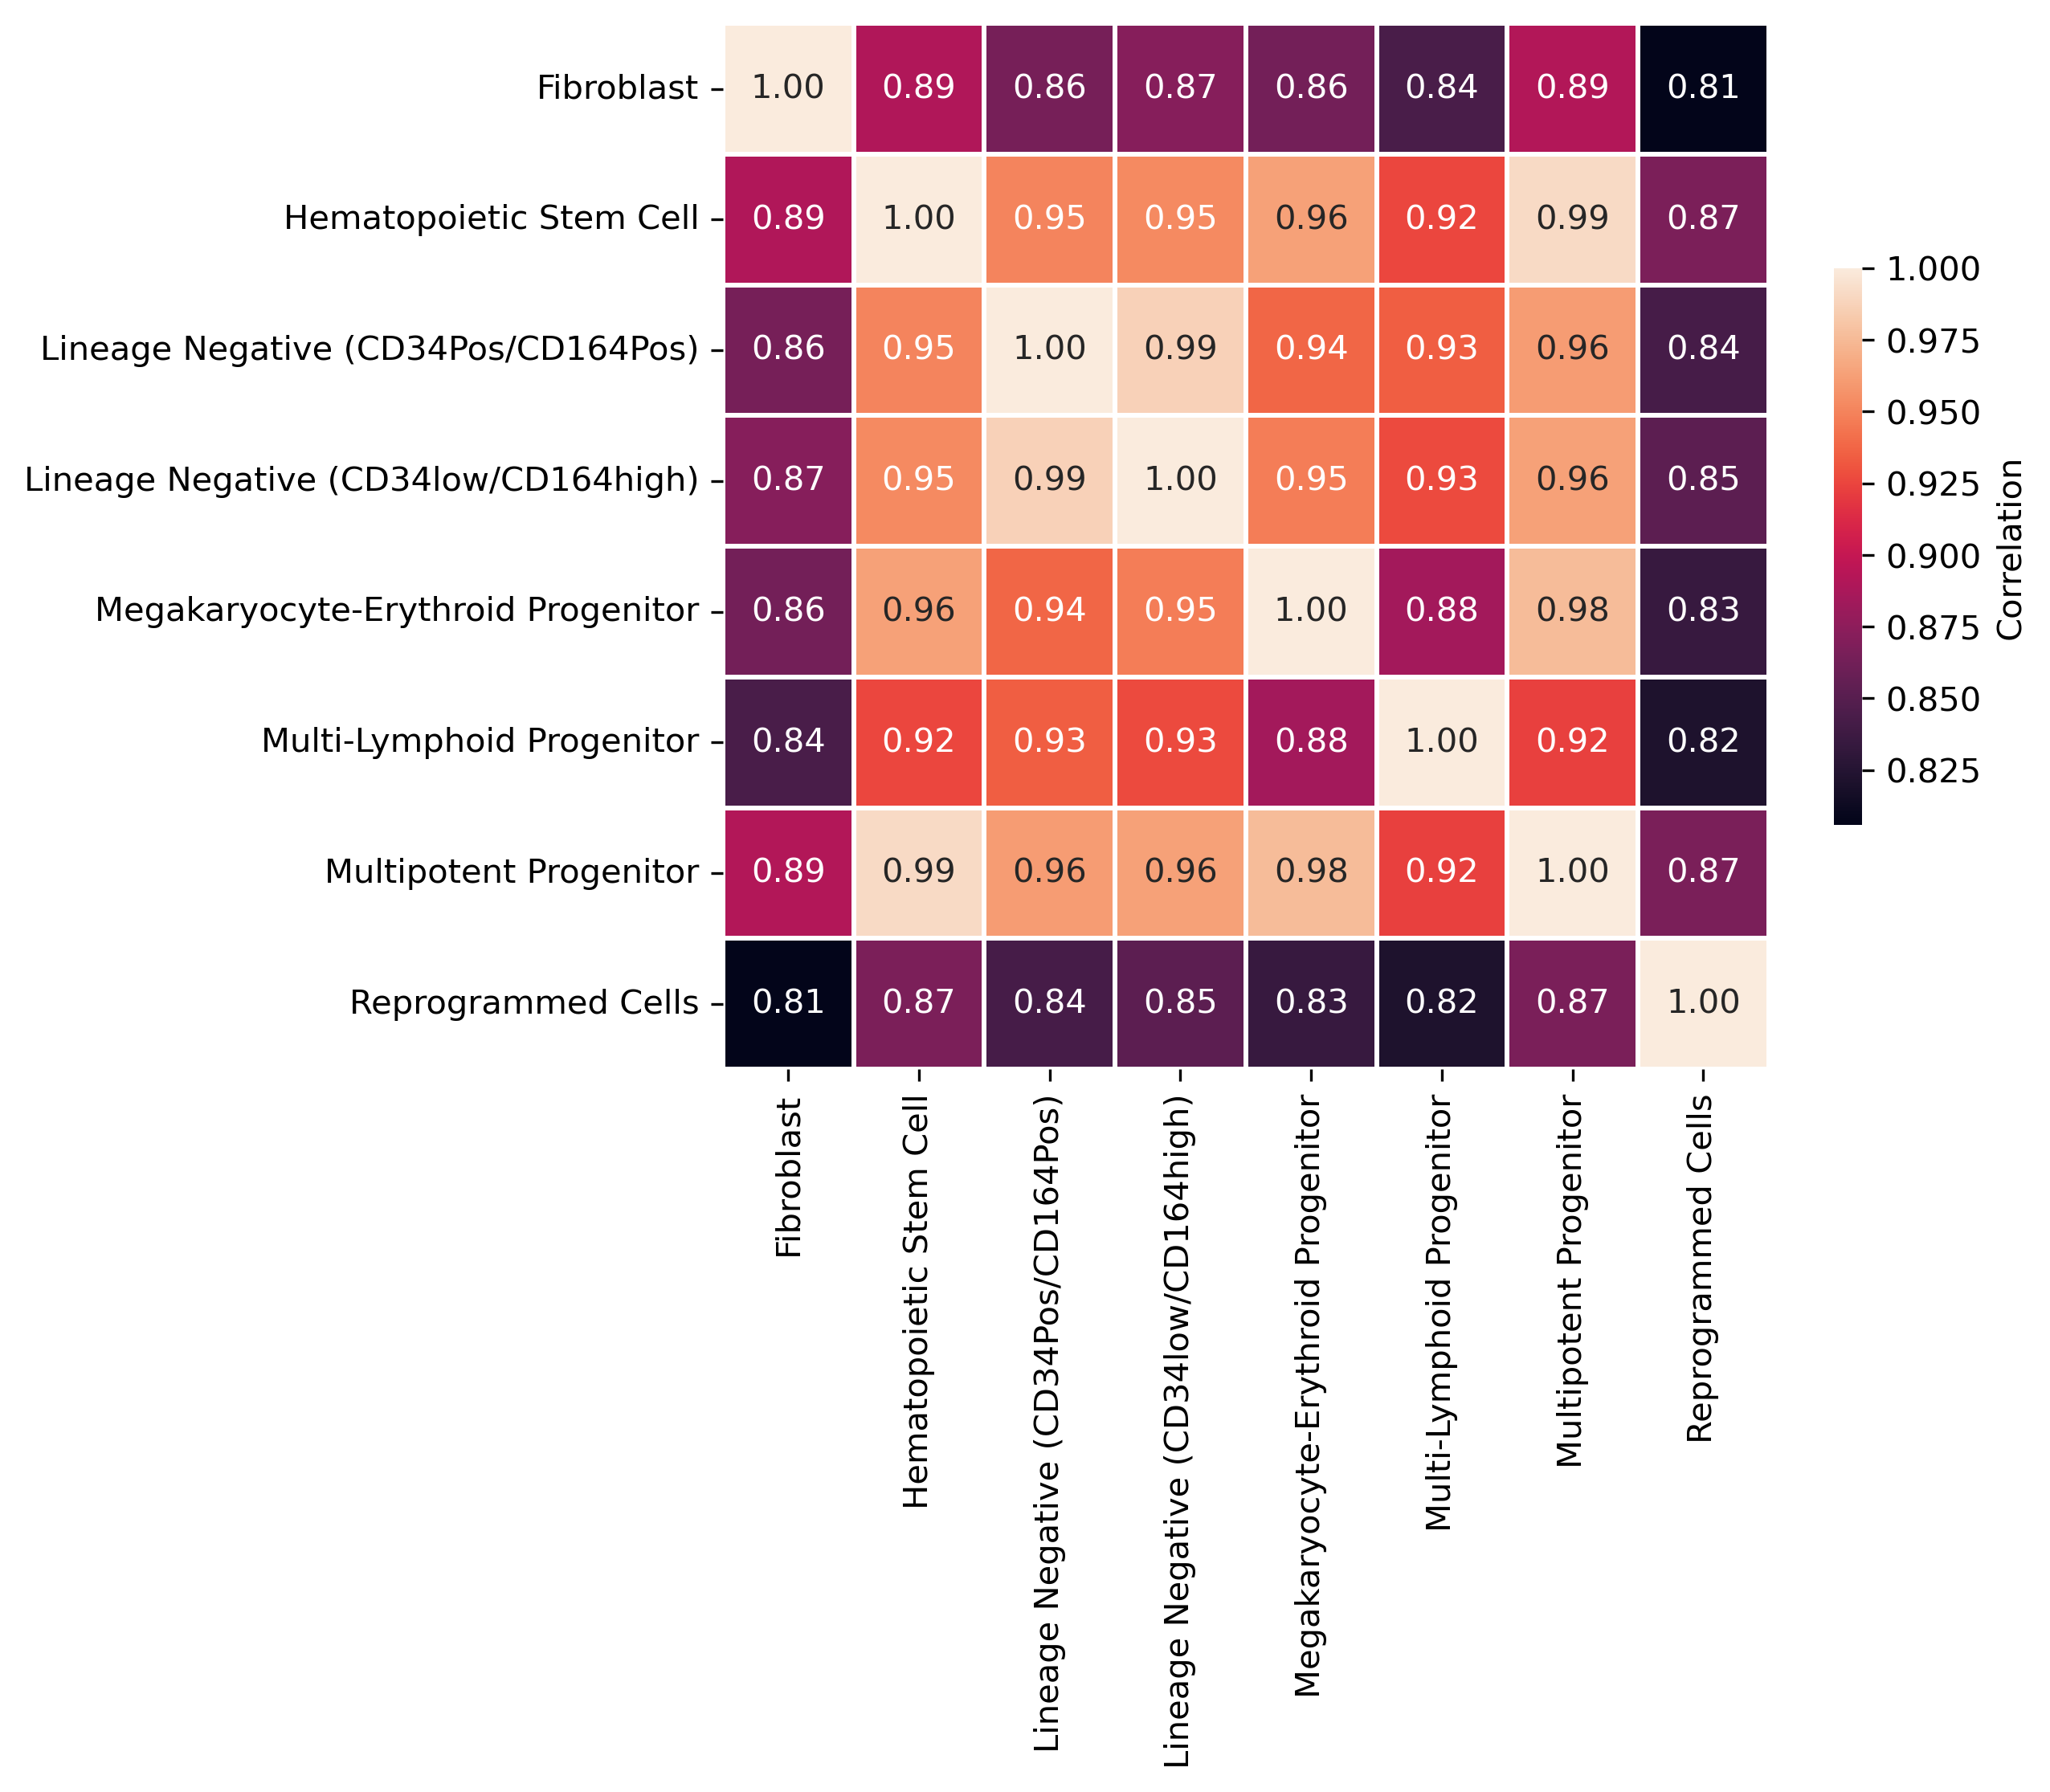

In [10]:
sns.heatmap(
    exp_df.corr(),
    square=True,
    lw=1,
    cbar_kws={'shrink' : 0.5, 'label' : 'Correlation'},
    annot=True,  # Add annotations
    fmt=".2f"  # Format annotations with two decimals
)

plt.ylabel("")
plt.xlabel("")

# Fibroblast Origins

['Bladder' 'Fat' 'Large Intestine' 'Prostate' 'Small Intestine' 'Thymus'
 'Tongue' 'Trachea' 'Vasculature']


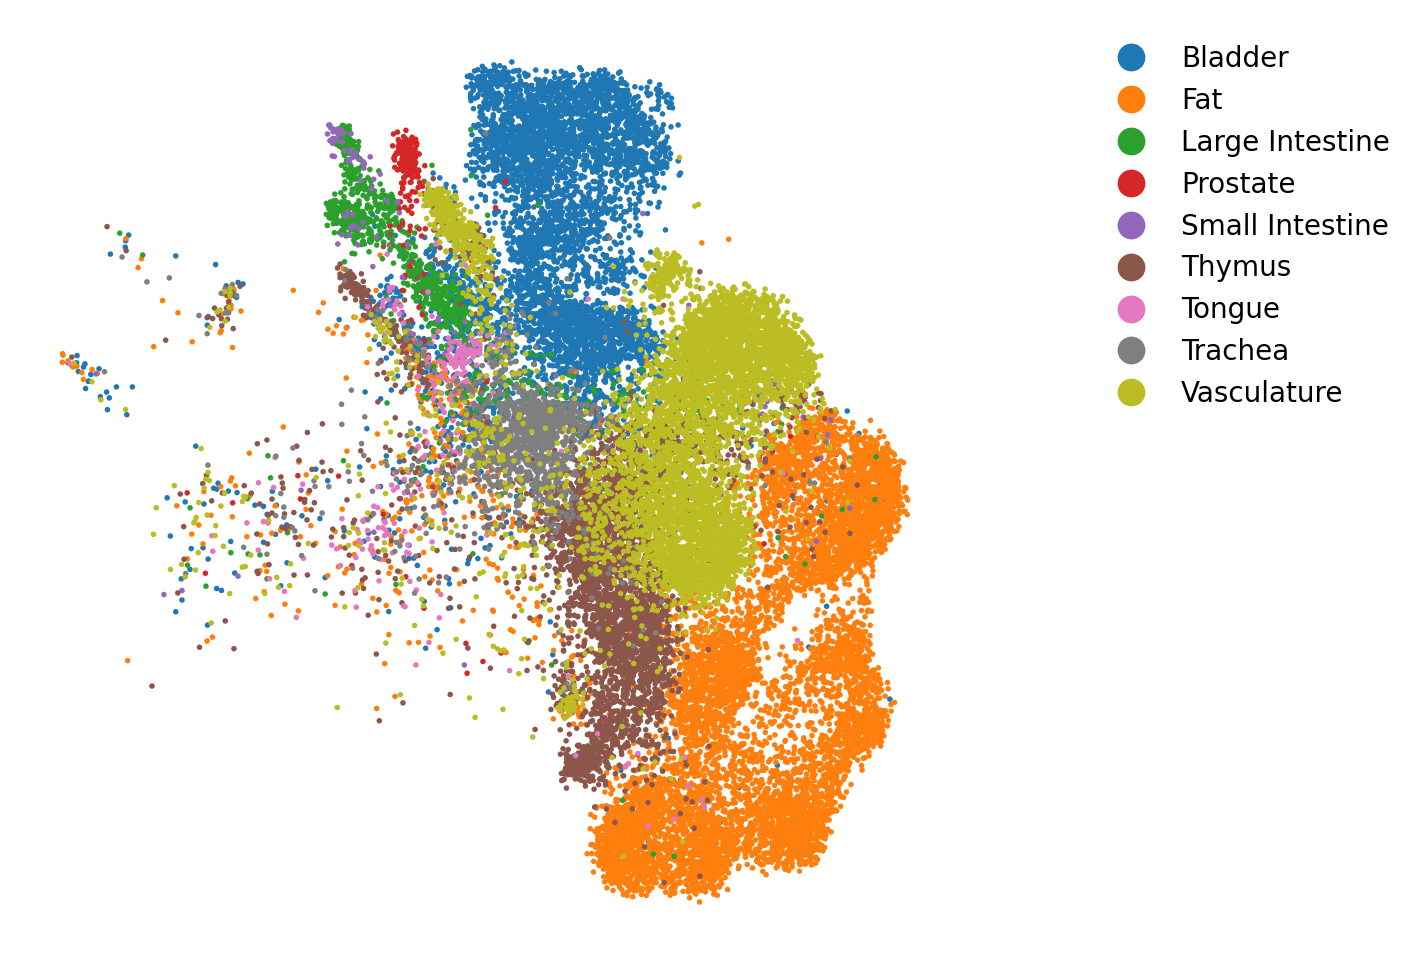

In [11]:
pdf = adata.obs.copy()

thresh = 0.20

pdf = pdf[pdf['cell_type'] == 'FB']
pdf['organ_tissue'] = pdf['organ_tissue'].astype(str)

pdf['organ_tissue'] = pdf['organ_tissue'].apply(lambda x: x.replace("_", " "))
pdf = pdf.sort_values(by='organ_tissue')
print(pdf['organ_tissue'].unique()) 

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6



sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=4,
    hue='organ_tissue',
    zorder=0,
)

# sns.kdeplot(
#     data=pdf, 
#     x='UMAP 1', 
#     y='UMAP 2', 
#     levels=2, 
#     thresh=thresh,
#     fill=True,   # Fill the area between the contour lines
#     alpha=0.35,  
#     hue='organ_tissue',
#     palette=color_list,
#     zorder=2,
# )

# sns.kdeplot(
#     data=pdf, 
#     x='UMAP 1', 
#     y='UMAP 2', 
#     levels=2,  
#     thresh=thresh,
#     hue='organ_tissue',
#     palette=color_list,
#     linewidths=1,
#     zorder=2,
# )

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    frameon=False,
    bbox_to_anchor=(1.5, 1),
    markerscale=5,
    ncol=1,
)

In [12]:
# break

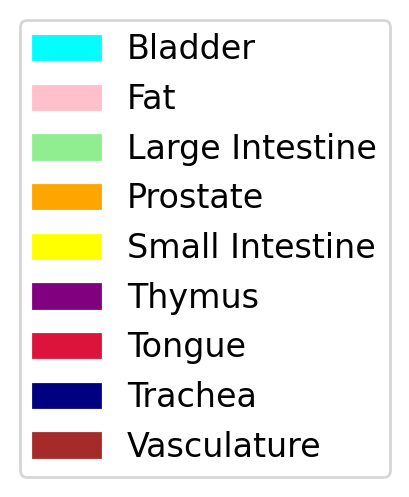

In [13]:
import matplotlib.patches as mpatches

# Data (Color names and labels)
color_names = ["Cyan", "Pink", "Light Green", "Orange", "Yellow", "Purple", "Crimson", "Navy Blue", "Brown"]
labels = ["Bladder", "Fat", "Large Intestine", "Prostate", "Small Intestine", "Thymus", "Tongue", "Trachea", "Vasculature"]
colors = ["#00FFFF", "#FFC0CB", "#90EE90", "#FFA500", "#FFFF00", "#800080", "#DC143C", "#000080", "#A52A2A"]

# Create Legend Elements
legend_elements = []
for i in range(len(labels)):
    legend_elements.append(mpatches.Patch(color=colors[i], label=f"{labels[i]}"))  # Use rectangle patches

# Create and Configure Legend
fig = plt.figure()  # Create a figure for the legend
ax = fig.add_subplot(111)  # Add a subplot (not used for plotting)
ax.set_axis_off()  # Hide axis

# Legend options
legend = ax.legend(handles=legend_elements, loc='center', fontsize=12, ncol=1)

# Fine-tune Legend appearance
plt.setp(legend.get_texts(), color='black')  # Ensure text color is black
fig.canvas.draw()  # Draw the figure to calculate sizes

# Adjust spacing (optional)
bbox = legend.get_window_extent()  # Get legend bounding box
bbox = bbox.transformed(fig.dpi_scale_trans.inverted())  # Scale to inches
fig.set_size_inches(bbox.width * 1.1, bbox.height * 1.1)  # Add a bit of padding

# Save or Display
#plt.savefig("legend.png", bbox_inches='tight', dpi=300)  # Save as high-resolution image
plt.show()  # Display the legend

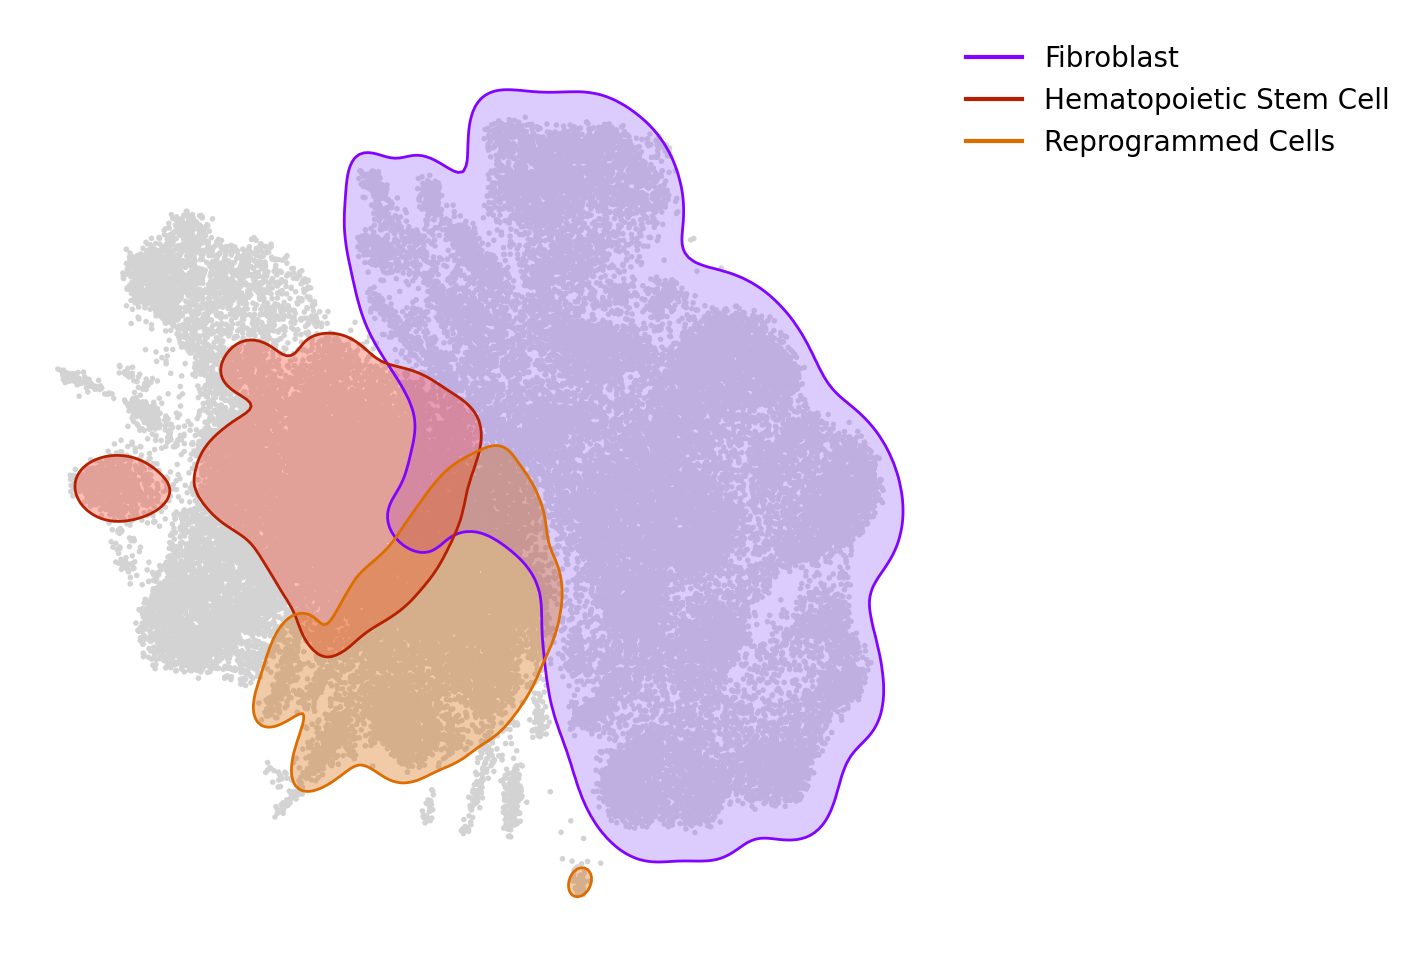

In [14]:
pdf = adata.obs.copy()
pdf['cell_label'] = pdf['cell_label'].astype(str)
cell_types_to_include = ['HSC', 'iHSC', 'FB']
mask = pdf['cell_type'].isin(cell_types_to_include)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6


sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=4,
    color='lightgrey',
    zorder=0,
)

sns.kdeplot(
    data=pdf[mask], 
    x='UMAP 1', 
    y='UMAP 2', 
    levels=2, 
    fill=True,   # Fill the area between the contour lines
    alpha=0.35,  
    hue='cell_label',
    hue_order=sorted(pdf[mask]['cell_label'].unique()),
    palette='gnuplot',
    zorder=2,
)

sns.kdeplot(
    data=pdf[mask], 
    x='UMAP 1', 
    y='UMAP 2', 
    levels=2,  
    hue='cell_label',
    hue_order=sorted(pdf[mask]['cell_label'].unique()),
    palette='gnuplot',
    linewidths=1,
    zorder=2,
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    frameon=False,
    bbox_to_anchor=(1.5, 1),
    markerscale=5,
    ncol=1,
)

# All cell types

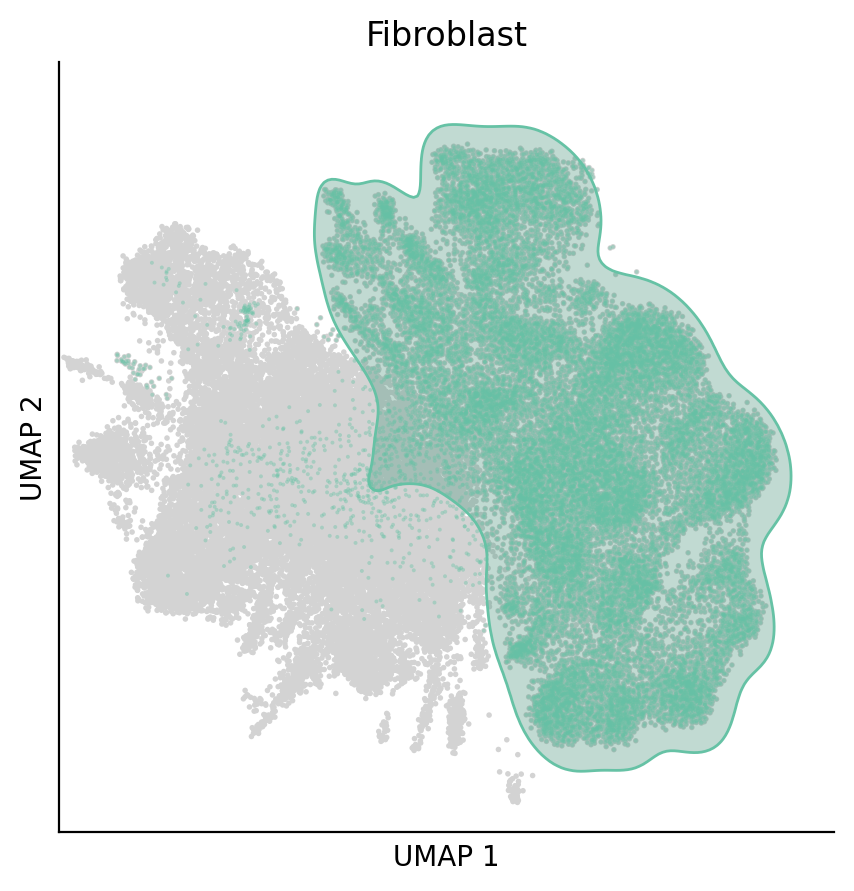

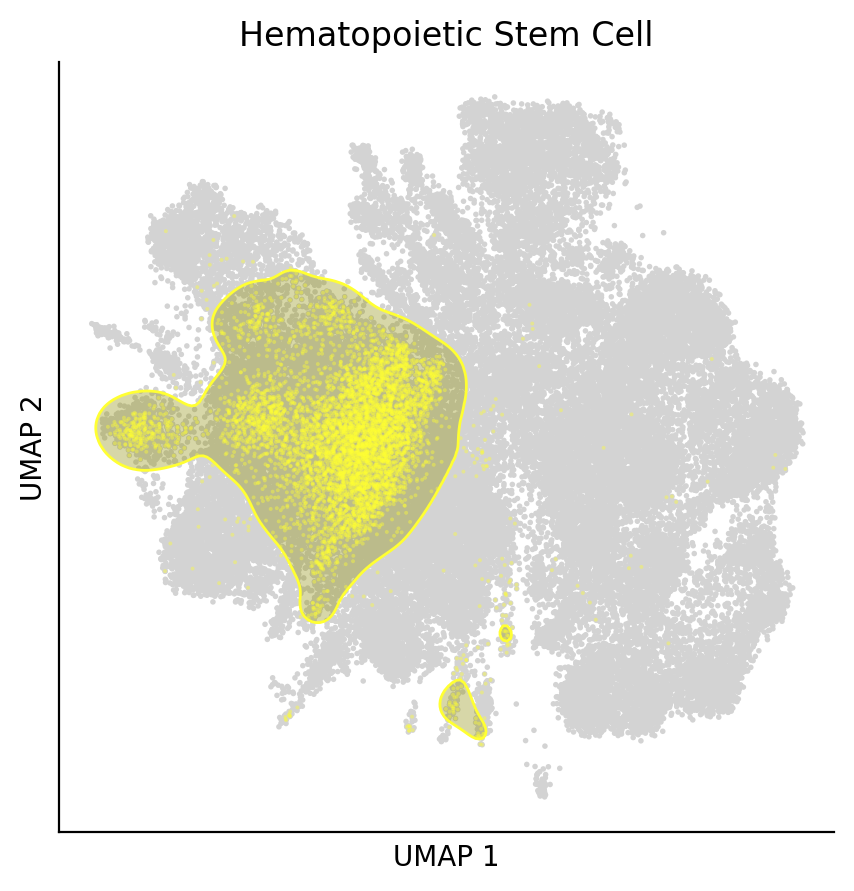

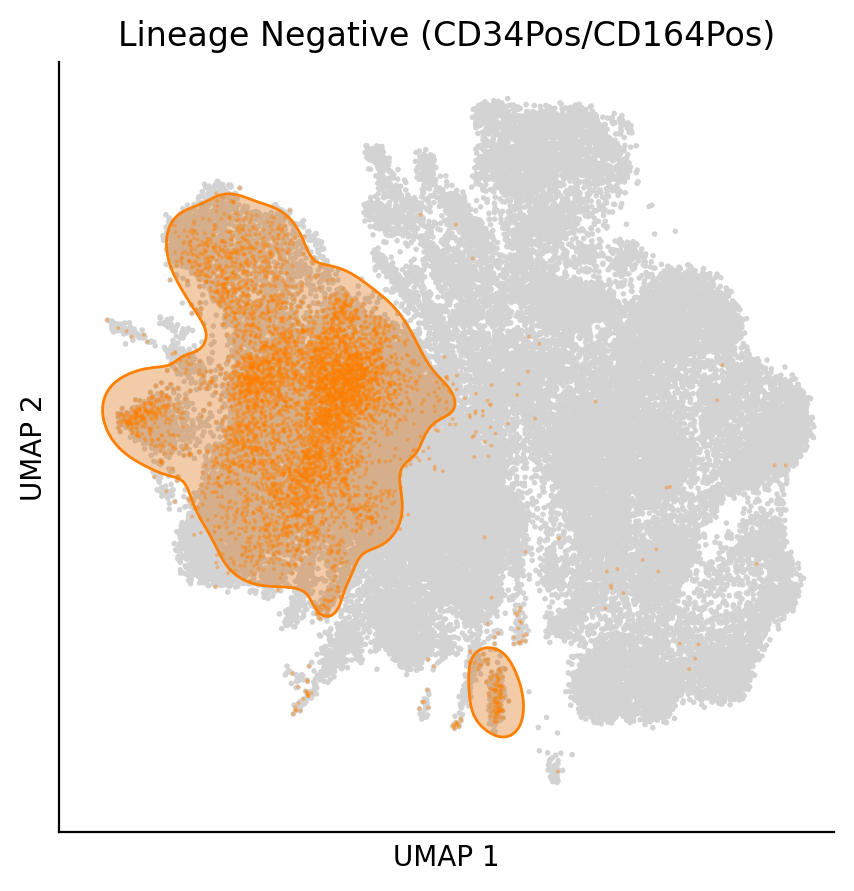

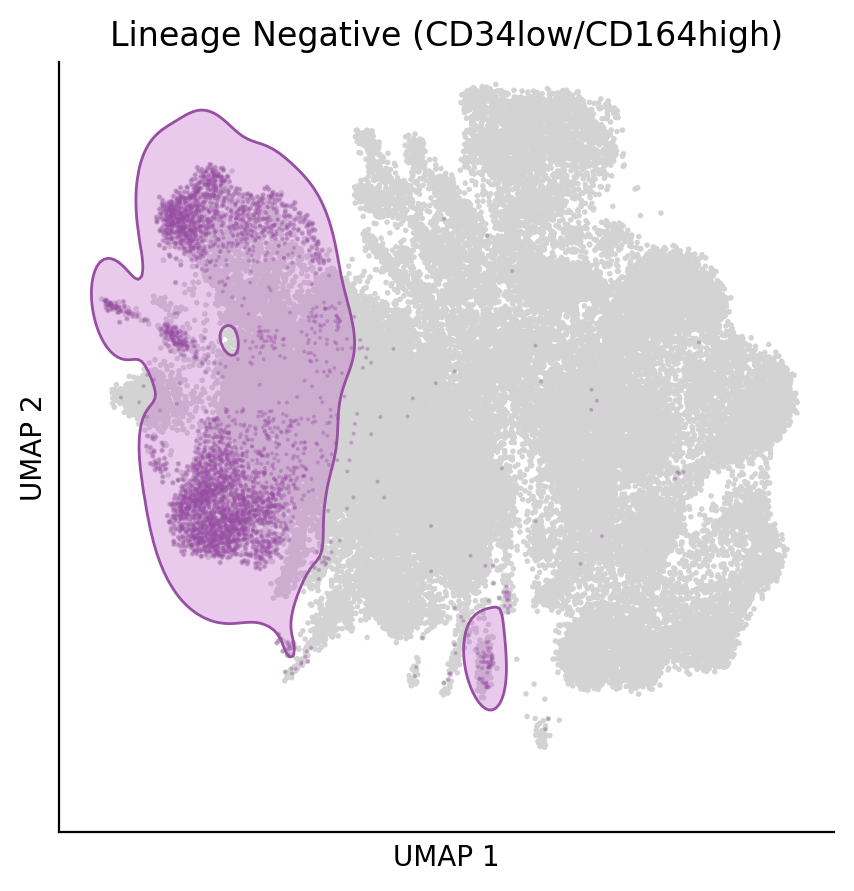

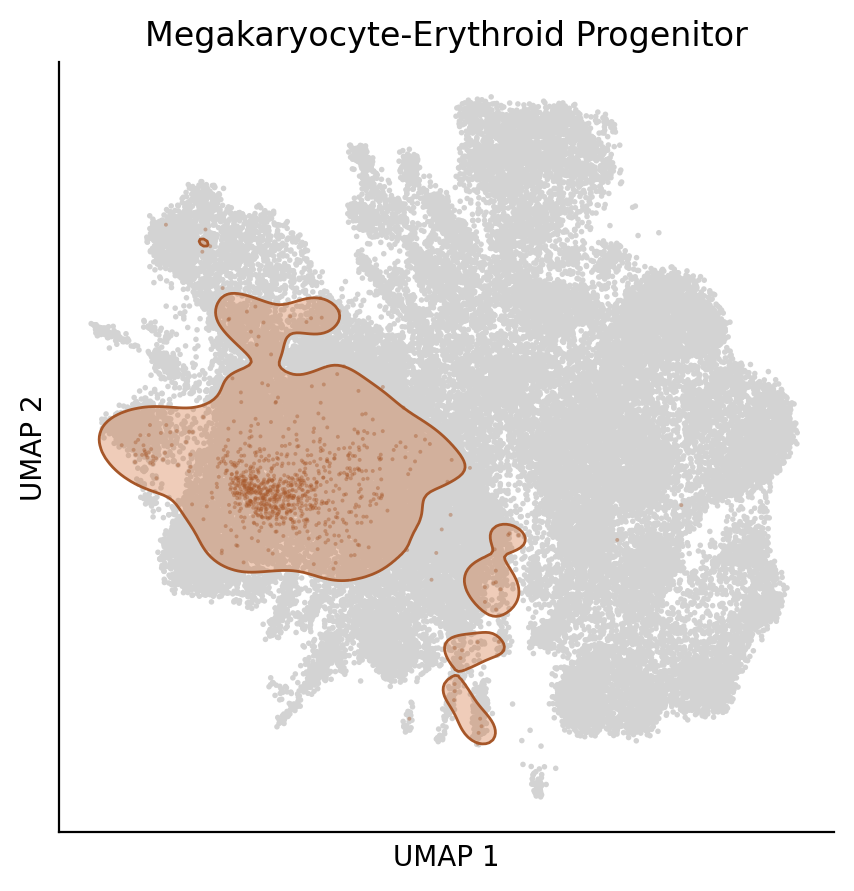

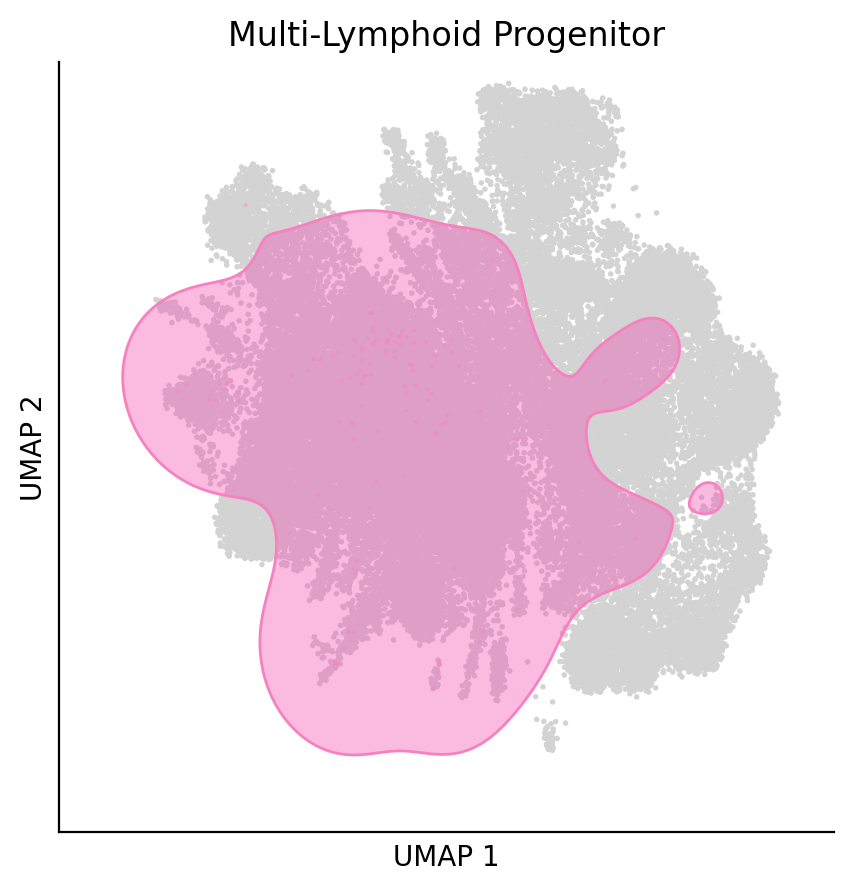

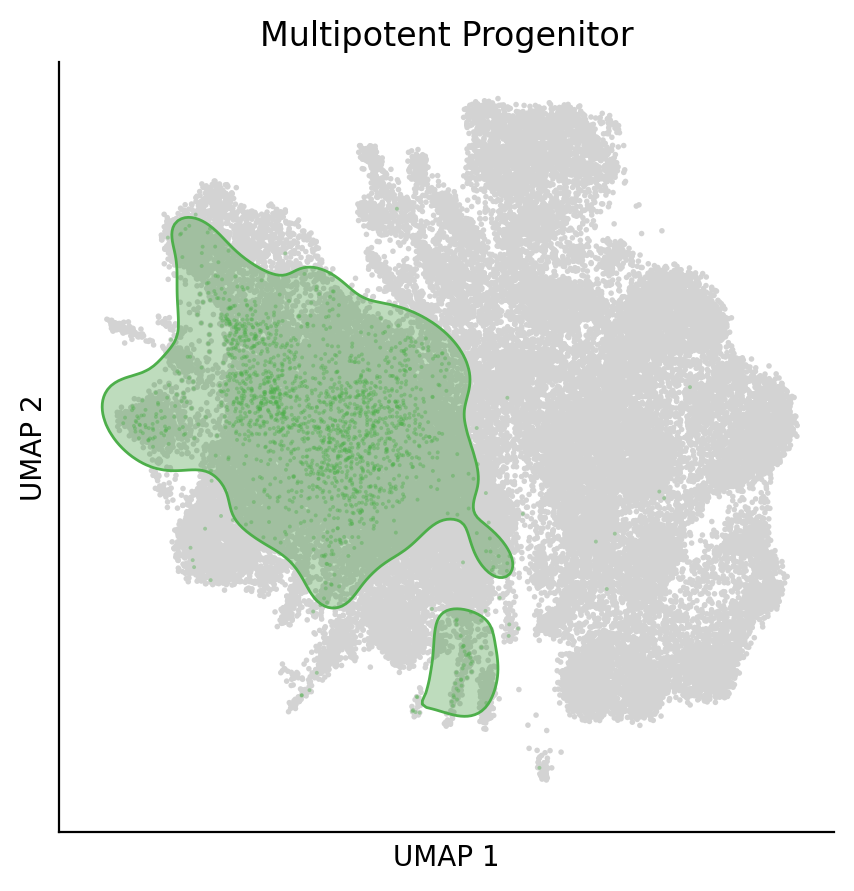

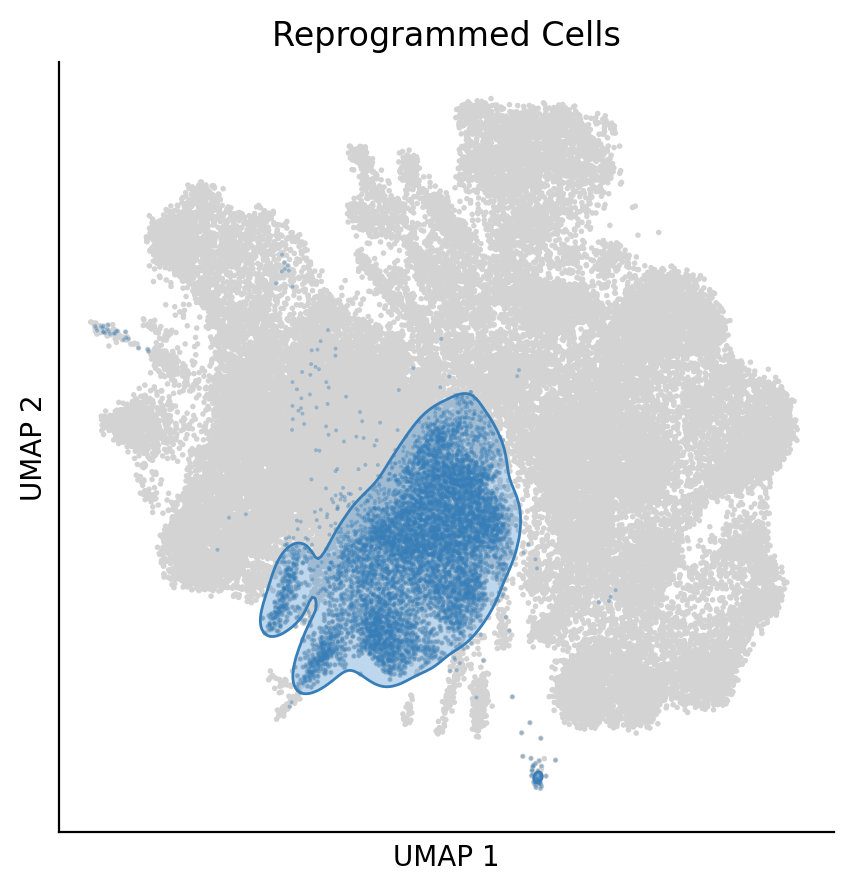

In [15]:
pdf = adata.obs.copy()
pdf['cell_label'] = pdf['cell_label'].astype(str)
pdf = pdf.sort_values(by='cell_label')

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 5

color_list = [
    '#377EB8', 
    '#4DAF4A', 
    '#F781BF', 
    '#A65628', 
    '#984EA3', 
    '#FF7F00',
    '#FFFF33',
    '#66C2A5'
][::-1]



for i, (cell_type, group) in enumerate(pdf.groupby('cell_label', sort=False)):
    mask = (pdf['cell_label'] == cell_type)
    
    sns.scatterplot(
        data=pdf,
        x='UMAP 1',
        y='UMAP 2',
        ec='none',
        s=4,
        color='lightgrey',
        zorder=0,
    )
    
    
    sns.scatterplot(
        data=pdf[mask],
        x='UMAP 1',
        y='UMAP 2',
        ec='none',
        s=2,
        alpha=0.4,
        color=color_list[i],
        zorder=5,
    )
    
    
    sns.kdeplot(
        data=pdf[mask], 
        x='UMAP 1', 
        y='UMAP 2', 
        levels=2, 
        fill=True,   
        alpha=0.35,  
        color=color_list[i],
        zorder=2,
    )
    
    sns.kdeplot(
        data=pdf[mask], 
        x='UMAP 1', 
        y='UMAP 2', 
        levels=2,  
        color=color_list[i],
        linewidths=1,
        zorder=2,
    )
    
    sns.despine()
    plt.xticks([])
    plt.yticks([])

    plt.ylabel('UMAP 2')
    plt.xlabel('UMAP 1')
    plt.gca().set_aspect('auto')
    
    plt.title(cell_type)
    plt.show()

# Expression

vmin=0.0
vmax=2


/tmp/ipykernel_2501188/1896884674.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


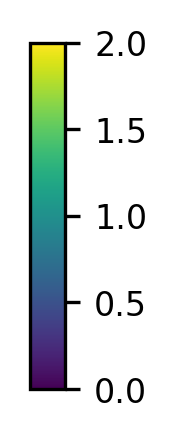

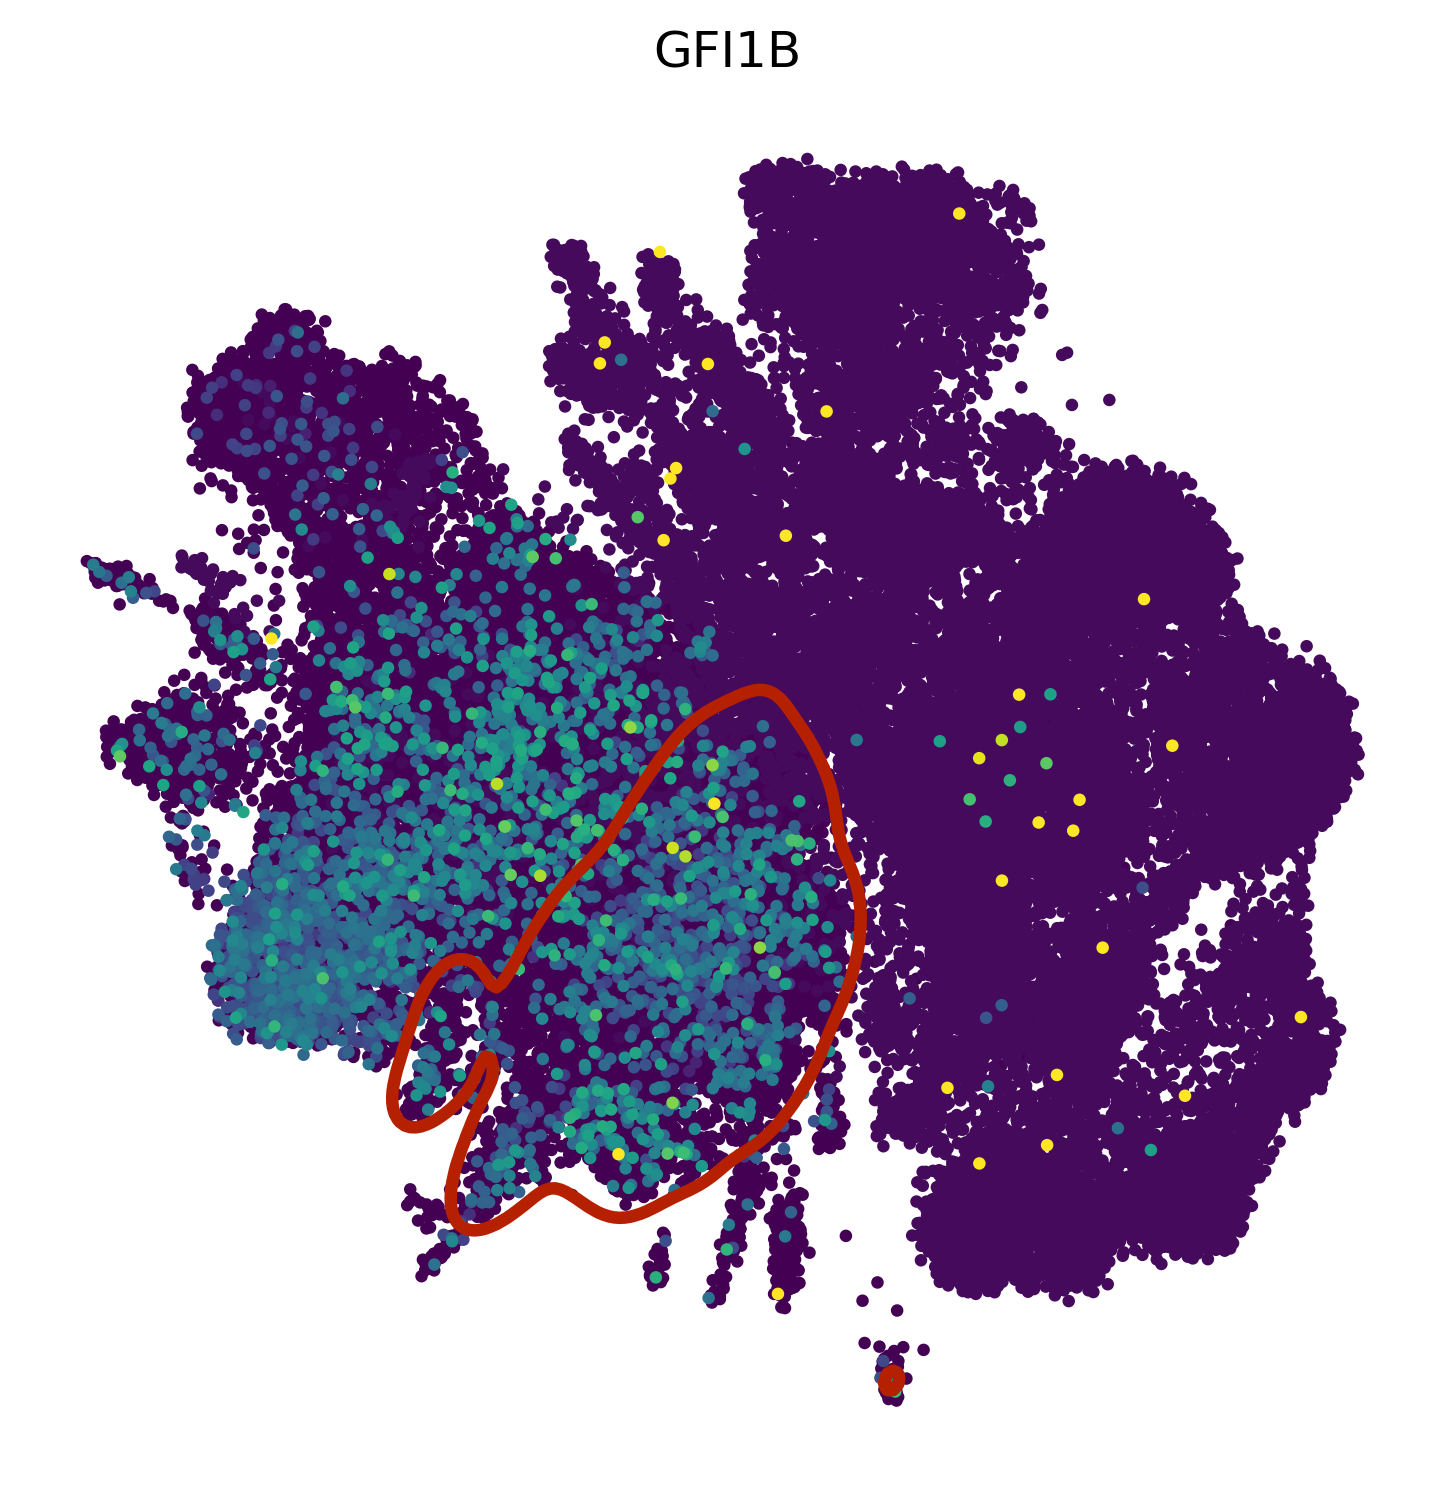

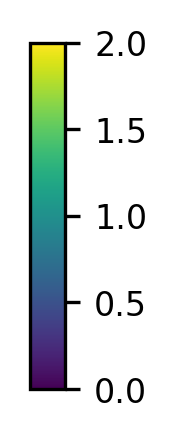

In [16]:
reload(plt2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 6, 6

gene = 'GFI1B'
vmin = 0
vmax = 2
expression = adata[:, gene].to_df().values.ravel()

order = np.argsort(expression)

# Determine vmin and vmax if not provided
vmin = max(np.min(expression), vmin)
vmax = min(np.max(expression), vmax)

print(f"{vmin=}")
print(f"{vmax=}")

fig, ax = plt.subplots()

scatter = ax.scatter(
    adata.obsm['X_umap'][:, 0][order],
    adata.obsm['X_umap'][:, 1][order],
    c=expression[order],
    cmap='viridis',
    vmin=vmin,
    vmax=vmax,
    s=4,
)

sns.kdeplot(
    data=pdf[mask], 
    x='UMAP 1', 
    y='UMAP 2', 
    levels=2,  
    hue='cell_label',
    hue_order=sorted(pdf[mask]['cell_label'].unique()),
    palette='gnuplot',
    linewidths=3,
    zorder=2,
)

plt.title(gene)
plt.gca().set_aspect('auto')
plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')

plt.legend().remove()

plt.axis(False)

plt2.create_standalone_colorbar(scatter)

In [17]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)